In [2]:
import matplotlib.pyplot as plt

In [2]:
filename = 'scaling.txt'

In [3]:
configs = {}
current_config = None
with open(filename, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("# TL"):
            current_config = line.split()[1]
            configs[current_config] = {'cores': [], 'sypd': []}
        elif line and not line.startswith("#"):
            parts = line.split()
            nodes, cores, sypd, chpsy = map(float, parts)
            configs[current_config]['cores'].append(int(cores))
            configs[current_config]['sypd'].append(sypd)

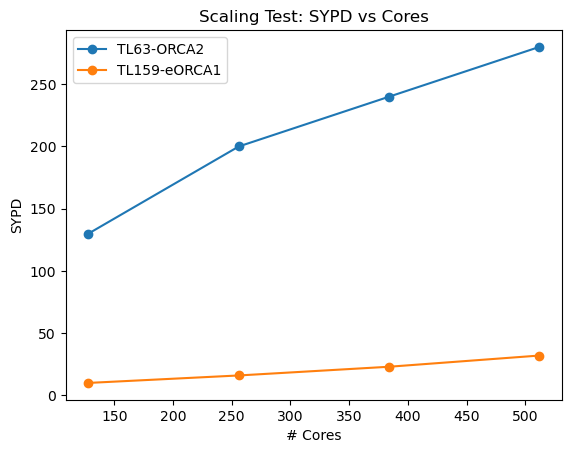

In [4]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    plt.plot(values['cores'], values['sypd'], marker='o', label=grid)
plt.xlabel('# Cores')
plt.ylabel('SYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')

In [6]:
values['cores'][0]

128

In [ ]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    s0 = values['sypd'][0]
    nvalues = [sypd/s0 for sypd in values['sypd']]
    ivalues = [cores/128 for cores in values['cores']]
    plt.plot(values['cores'], nvalues, marker='o', label=grid)
plt.plot(values['cores'],ivalues, '-', label='Ideal scaling')
plt.xlabel('# Cores')
plt.ylabel('ΔSYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')

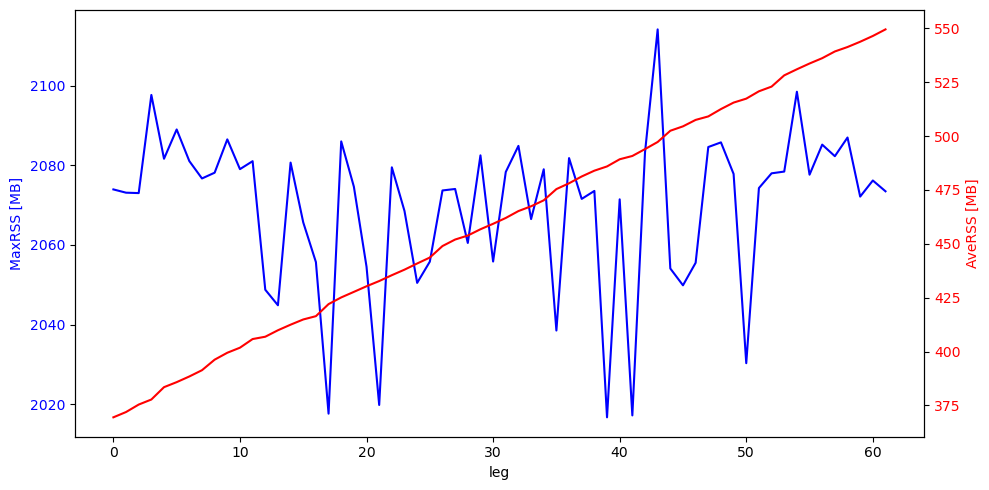

In [3]:
# Load data from file
filename = '/ec/res4/hpcperm/itas/ecearth4/jobs/FE01/rss_usage_results.txt'

# Lists to hold the data
indices = []
max_rss_mb = []
ave_rss_mb = []

with open(filename, 'r') as file:
    for index, line in enumerate(file):
        parts = line.split()
        indices.append(index)  # Use the row index as the x-axis value
        max_rss_mb.append(float(parts[1]))  # Assuming the values are in MB
        ave_rss_mb.append(float(parts[2]))  # Assuming the values are in MB

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MaxRSS on the primary y-axis
ax1.plot(indices, max_rss_mb, 'b-', label='MaxRSS')
ax1.set_xlabel('leg')
ax1.set_ylabel('MaxRSS [MB]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(indices, ave_rss_mb, 'r-', label='AveRSS')
ax2.set_ylabel('AveRSS [MB]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('fig.png', format='png')

# Show the figure
plt.show()